# We will work on a sample data of Ford Card. The csv file is available in same folder. 

At first we will import numpy, pandas, patplotlib and seaborn before starting the analysis.

In [17]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

After importing all libraries, we will check the data type, and sample table.

In [18]:
df = pd.read_csv("ford.csv")

#We will check the data type
print(type(df))

#We will check the sample data(Top 5 Row)
display(df.head())

#We will check the sample data(Bottom 5 Row)
display(df.tail())

#We will check the basic information of numbers.
display(df.describe())

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


,year,price,mileage,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,10.125632,0.432383
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,201.800000,5.000000


# Now we will create a PIE chart of transmission of ford car to show the number of cars in Automatic, Semi-Auto, Manual engine in percentage. 

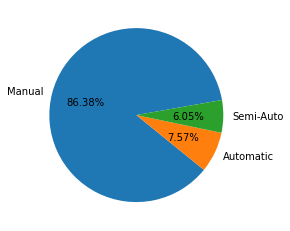

In [19]:
df["transmission"].value_counts().plot(kind="pie", autopct='%1.2f%%', startangle=10)

# to hide the y lebel
plt.ylabel("")

plt.show()

Here we can see more than 86% of Ford cars is running with manual transmission. Cars with manual transmissions are traditionally known to be more fuel efficient since the engines are lighter and less complicated. Manual transmissions offer the driver greater control over the vehicle since they get to choose what gear to use and when.

# Now we will create a bar plot to check the total cars in different type of fuel.

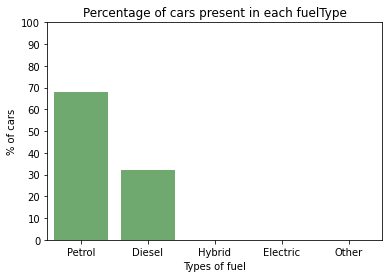

In [20]:
#The data table
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

#to decrease the percentage decimal.
df_fuelType = df_fuelType.round(2)
#display(df_fuelType)

#Main bar plot query
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="g",
            alpha=0.6)

# to change the x lebel
plt.xlabel("Types of fuel")

# to change the y lebel
plt.ylabel("% of cars")

# to update the title
plt.title("Percentage of cars present in each fuelType")

# y lebel data series
plt.yticks(np.arange(0,101,10))

plt.show()

The bar plot is done. Here we use single color because of viewing only on type of data. 

Here we can see that almost 68% of Ford cars running with petrol. The second most used fuel is Diesel, more than 30% of ford cars use diesel. 

Conventional diesel and petrol are both produced from mineral oil, but the precise refining methods vary. Diesel is in principle easier to refine than gasoline, however it contains more pollutants that must be extracted before it can reach the same levels of emissions as petrol. Per litre, diesel contains more energy than petrol and the vehicle’s engine combustion process is more efficient, adding up to higher fuel efficiency and lower CO2 emissions when using diesel.

# Now we will initiate 4 Scatter Plot to check mileage, year, mpg, enginesize variations affect in Price.

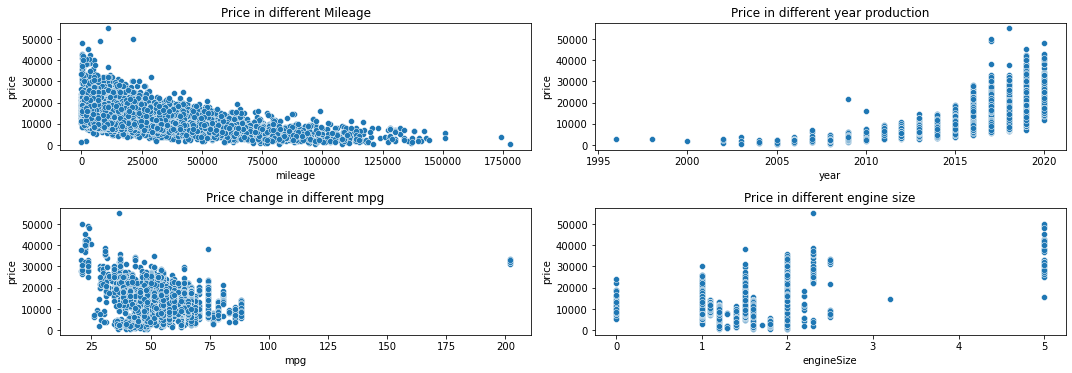

In [21]:
#At first we will- lock the size for 4 scatter plots
plt.figure(figsize=(15,10))

# 1st scatterplot
plt.subplot(4, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df)
#title add
plt.title("Price in different Mileage")


# 2nd scatterplot
plt.subplot(4, 2, 2)
sns.scatterplot(x="year", y="price", data=df)
#title add
plt.title("Price in different year production")


# 3rd scatterplot
plt.subplot(4, 2, 3)
sns.scatterplot(x="mpg", y="price", data=df)
#title add
plt.title("Price change in different mpg")


# 4th scatterplot
plt.subplot(4, 2, 4)
sns.scatterplot(x="engineSize", y="price", data=df)
#title add
plt.title("Price in different engine size")

# Organize the scatter plots
plt.tight_layout()
plt.show()

Here we find the price changed in different mileage, production year, mpg(miles per gallon), and engine size.

On first chart, price in different mileage shows that low mileage car has the high price. It is ovious that the higher mileage will decrease the car condition and reduce price. 

Same goes to the 2nd chart, the older card will loose price. The newer model has the high resell value. 

The mpg(miles per gallon) is slightly confusing. in general rule, high mpg will increase the price.

Last chart, price in different engine size shows that 1 engine cars price varies between 5000 to 28000. Two enine cars price increased to 36000 and 5 engine cars price increased up to 50000. So the higher engine size will make high resale value.

## No we will add transmission hue in all 4 scatterplot and check the result in differnt transmission.

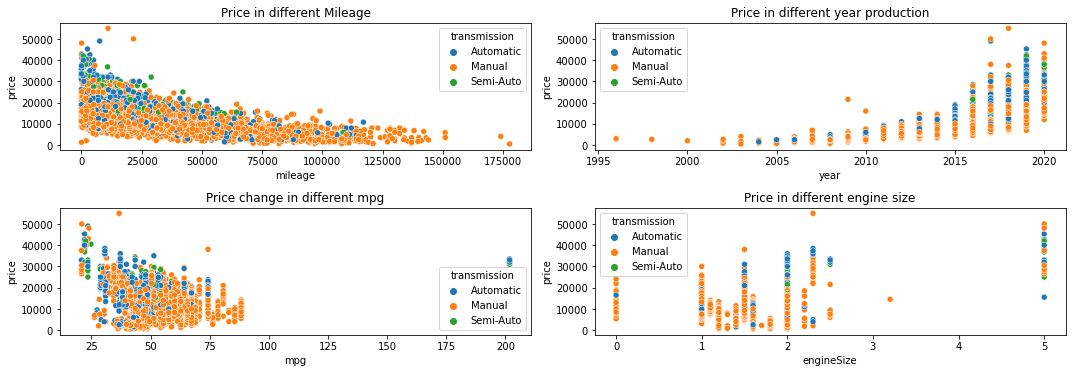

In [22]:
#At first we will- lock the size for 4 scatter plots
plt.figure(figsize=(15,10))


# 1st scatterplot
plt.subplot(4, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="transmission")
#title add
plt.title("Price in different Mileage")


# 2nd scatterplot
plt.subplot(4, 2, 2)
sns.scatterplot(x="year", y="price", data=df, hue="transmission")
#title add
plt.title("Price in different year production")


# 3rd scatterplot
plt.subplot(4, 2, 3)
sns.scatterplot(x="mpg", y="price", data=df, hue="transmission")
#title add
plt.title("Price change in different mpg")


# 4th scatterplot
plt.subplot(4, 2, 4)
sns.scatterplot(x="engineSize", y="price", data=df, hue="transmission")
#title add
plt.title("Price in different engine size")

# Organize the scatter plots
plt.tight_layout()
plt.show()

The first chart shows automatic cars has the high value comparing to manual and semi auto. Same goes to production year.

In the 3rd chart, we see the automatic cars has the high value in different mpg, especially low mpg. In the 4th chart we see automatic cars has the high price comparing to manual cars.

# We will create 2 Regression Plots

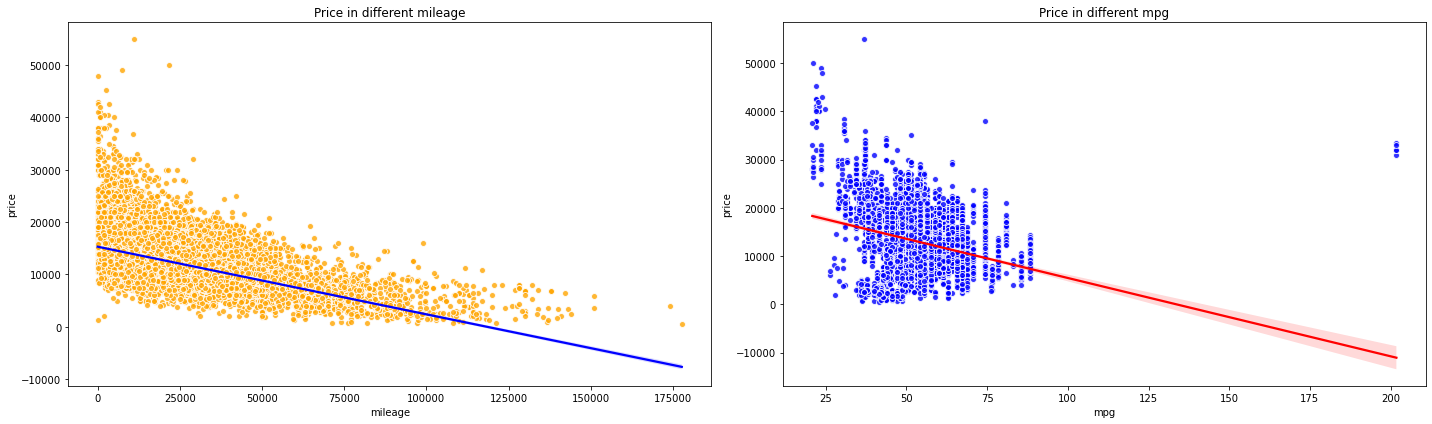

In [23]:
#At first we will- lock the size for 2 Regression plots
plt.figure(figsize=(20,6))


# 1st Regression_plots
plt.subplot(1, 2, 1)
sns.regplot(x="mileage", y="price", data=df, line_kws={"color":"blue"}, scatter_kws={"color":"orange", "edgecolor":"white"})
# we defined the color to orange and line to blue
#title add
plt.title("Price in different mileage")


# 2nd Regression_plots
plt.subplot(1, 2, 2)
sns.regplot(x="mpg", y="price", data=df, line_kws={"color":"red"}, scatter_kws={"color":"blue", "edgecolor":"white"})
# we defined the color to blue and line to red
#title add
plt.title("Price in different mpg")


# Organize the regression plots
plt.tight_layout()
plt.show()

In this two regression plots we can see the price changes in different variables. In first chart the trend line shows a negative relation of mileage with price. The high mileage will decrease the price.

# Now we will create a Pair plot to see correlations among the numaric variables.

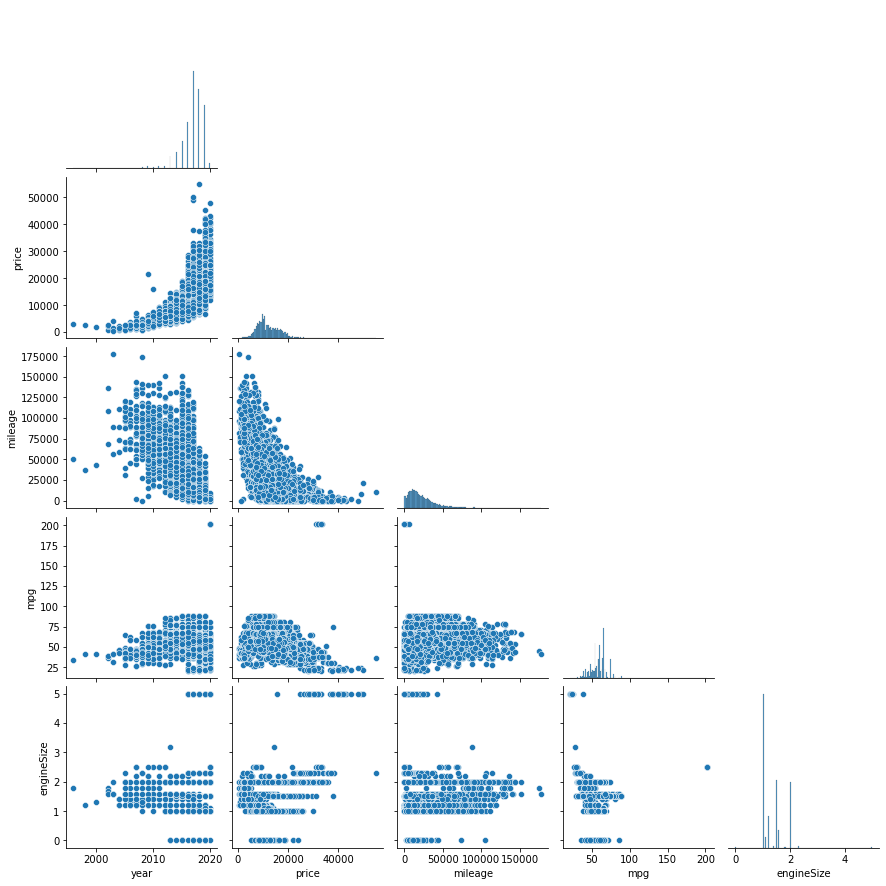

In [24]:
sns.pairplot(df, corner=True)
plt.show()

The chart shows the correlatios among numaric variables in the Ford car database.

## Now will add a hue (transmission) in this pair plot.

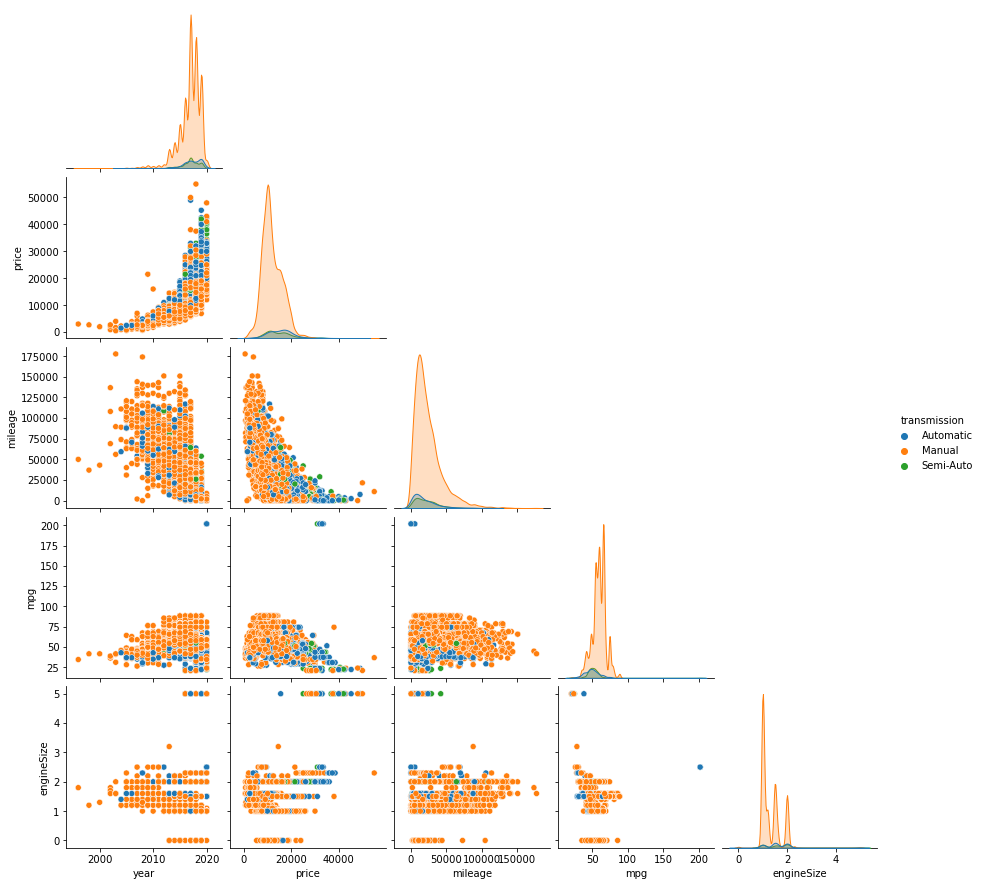

In [25]:
sns.pairplot(df, hue="transmission", corner=True)
plt.show()

We can see here the different type of caes correlation among numaric variables (year, price, mileage, mpg, engine size)

# Now we will create a Box Plot for mpg(miles per gallon) to see different numarical positions of mpg.

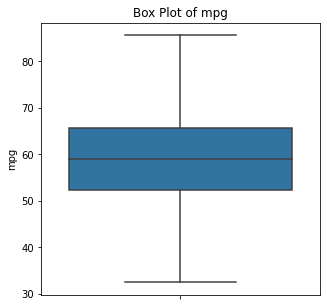

In [26]:
#At first we will lock the size
plt.figure(figsize=(5,5))
sns.boxplot(y = "mpg", data=df, showfliers=False)
plt.title("Box Plot of mpg")
plt.show()

Here we find the min point, max point, 25th percentile, 75th percentile and the median value of mpg. We can check the median value at 58. the 25th percentile of mpg is 52 and 75th percentile is 65.

# To check clear visibility of mpg we will make Histogram of mpg

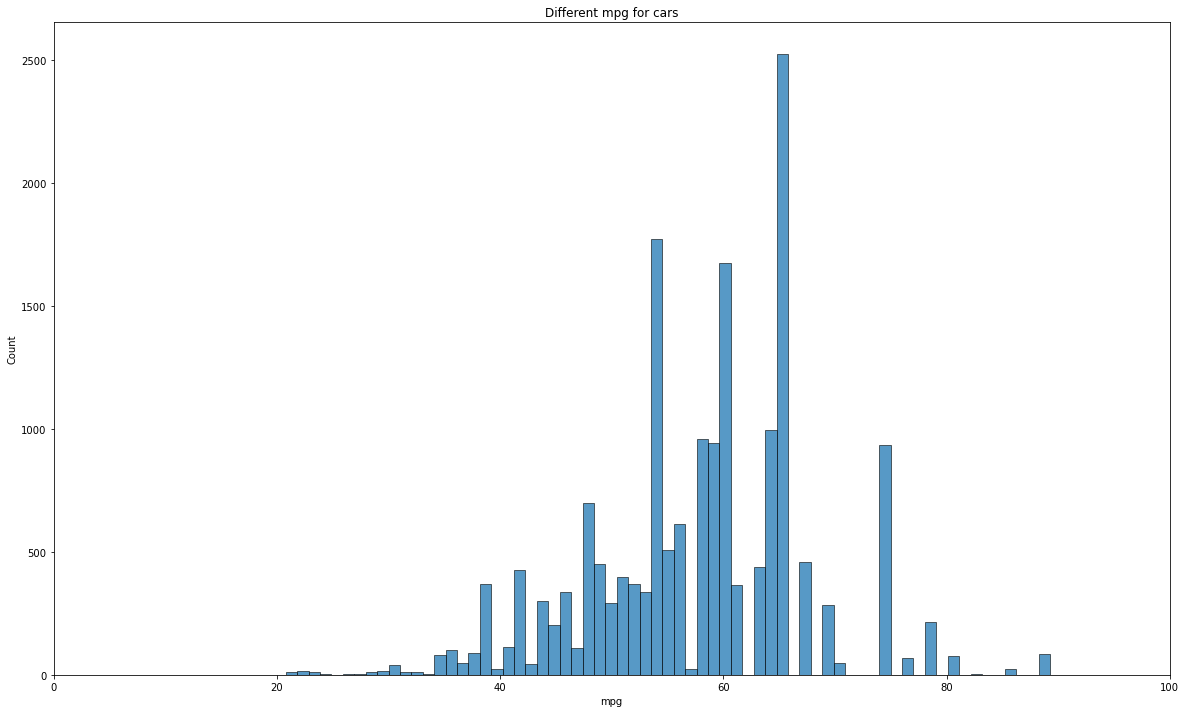

In [27]:
#At first we will lock the size
plt.figure(figsize=(20,12))

# plt.subplot(2,3,1)
sns.histplot(x="mpg", data=df)

#Fix the x axis limit
plt.xlim(0, 100, 5)

#Change the title
plt.title("Different mpg for cars")

plt.show()

In this histogram chart we see another view of different mpg(miles per gallon) of ford cars.Total of 2500 cars has 66 mpg.

## Now will add a hue (transmission) in this Histogram.

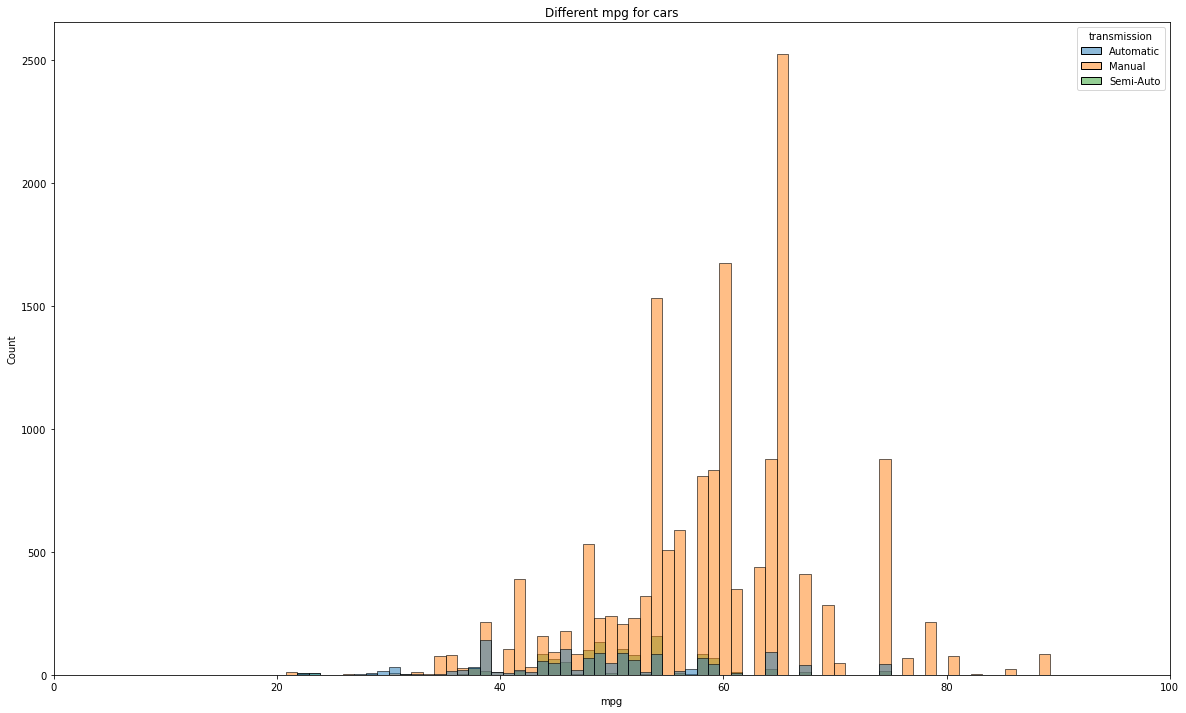

In [28]:
#At first we will lock the size
plt.figure(figsize=(20,12))

sns.histplot(x="mpg", data=df, hue="transmission")

#Fix the x axis limit
plt.xlim(0, 100, 5)

#Change the title
plt.title("Different mpg for cars")

plt.show()

By adding a transmission hue, we can see the different transmission for different mpg. The reason for 2500 cars in 66 mpg for Manual cars. The transmission hue helps here to check which type of cars making the difference.